## Single Large AND Several Small habitat patches: A community perspective on their importance for biodiversity

Leonna Szangolies, Marie-Sophie Rohwäder, Florian Jeltsch

In [1]:
#import packages
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns

### Baseline scneario

In [7]:
#read in data of baseline scenario 
#the available data is a subset including only one repetition per scenario and only 30 simulation years (instead of 50)
level=pd.read_csv("data/base_risk_level_subset.csv",header=6,na_values=["<RuntimePrimitiveException>"])

In [21]:
covia_level=np.zeros((10,7,11))
ix=0
for i in np.unique(level["perc_small"]):
    jx=0
    for j in np.unique(level["bold_prob"]):
        sub=level[np.logical_and(level["perc_small"]==i, level["bold_prob"]==j)]
        runs=np.unique(sub["[run number]"])
        rx=20
        for r in runs:
            sub1=sub[sub["[run number]"]==r]
            for k in range(1,11):
                covia_level[k-1,jx,ix]=np.min(sub1[sub1["spec_num"]<k]["[step]"])
            rx=rx+1
        jx=jx+1
    ix=ix+1

In [34]:
#delete large dataset to free space
del level

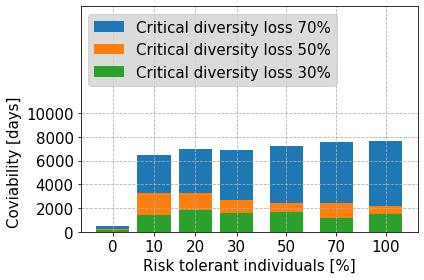

In [22]:
#barplot
for i in [2,4,6]:
    plt.bar([0,1,2,3,4.2,5.4,6.6],np.nanmean(covia_level[i],axis=(1)),label="Critical diversity loss "+str([70,50,30][round(i/2-1)])+"%")
plt.xticks([0,1,2,3,4.2,5.4,6.6],np.array([0,1,2,3,5,7,10])*10,fontsize=15)
plt.xlabel("Risk tolerant individuals [%]",fontsize=15)
plt.ylabel("Coviability [days]                  ",fontsize=15)
plt.yticks(np.arange(0,11000,2000),fontsize=15)
plt.ylim(0,19000)
plt.grid(linestyle="--")
plt.legend(loc="upper left",fontsize=15,facecolor="lightgrey")
plt.tight_layout();

In [2]:
#read in data of baseline scenario
base=pd.read_csv("data/base.csv",header=6)

In [41]:
#extract species composition and coviability from data
covia=np.zeros((11,3,6))
covia_conf=np.zeros((11,3,6,2))
indivs=np.zeros((11,3,6,10))
indivs_small=np.zeros((11,3,6,10))
indivs_large=np.zeros((11,3,6,10))
mass=np.zeros((11,3,6))
dx=0
for k in [0,0.05,0.1,0.15,0.25,0.5]:
    ix=0
    for i in np.unique(base["perc_small"]):
        jx=0
        for j in [1,4,13]:
            sub=base[np.logical_and(np.logical_and(base["perc_small"]==i,base["size_small"]==j),base["bold_prob"]==k)]
            covia[ix,jx,dx]=np.mean(sub["ticks"])
            covia_conf[ix,jx,dx,:]=st.t.interval(0.95, len(sub["ticks"])-1, loc=np.mean(sub["ticks"]), scale=st.sem(sub["ticks"]))
            mass[ix,jx,dx]=np.mean(sub['mean [mass] of turtles'])
            indivs[ix,jx,dx,:]=[np.mean(sub['count turtles with [species = 0]']),
                             np.mean(sub['count turtles with [species = 1]']),
                             np.mean(sub['count turtles with [species = 2]']),
                             np.mean(sub['count turtles with [species = 3]']),
                             np.mean(sub['count turtles with [species = 4]']),
                             np.mean(sub['count turtles with [species = 5]']),
                             np.mean(sub['count turtles with [species = 6]']),
                             np.mean(sub['count turtles with [species = 7]']),
                             np.mean(sub['count turtles with [species = 8]']),
                             np.mean(sub['count turtles with [species = 9]'])]
            indivs_small[ix,jx,dx,:]=[np.mean(sub['count turtles with [core = 2 and species = 0]']),
                             np.mean(sub['count turtles with [core = 2 and species = 1]']),
                             np.mean(sub['count turtles with [core = 2 and species = 2]']),
                             np.mean(sub['count turtles with [core = 2 and species = 3]']),
                             np.mean(sub['count turtles with [core = 2 and species = 4]']),
                             np.mean(sub['count turtles with [core = 2 and species = 5]']),
                             np.mean(sub['count turtles with [core = 2 and species = 6]']),
                             np.mean(sub['count turtles with [core = 2 and species = 7]']),
                             np.mean(sub['count turtles with [core = 2 and species = 8]']),
                             np.mean(sub['count turtles with [core = 2 and species = 9]'])]
            indivs_large[ix,jx,dx,:]=[np.mean(sub['count turtles with [core = 1 and species = 0]']),
                             np.mean(sub['count turtles with [core = 1 and species = 1]']),
                             np.mean(sub['count turtles with [core = 1 and species = 2]']),
                             np.mean(sub['count turtles with [core = 1 and species = 3]']),
                             np.mean(sub['count turtles with [core = 1 and species = 4]']),
                             np.mean(sub['count turtles with [core = 1 and species = 5]']),
                             np.mean(sub['count turtles with [core = 1 and species = 6]']),
                             np.mean(sub['count turtles with [core = 1 and species = 7]']),
                             np.mean(sub['count turtles with [core = 1 and species = 8]']),
                             np.mean(sub['count turtles with [core = 1 and species = 9]'])]
            jx=jx+1
        ix=ix+1
    dx=dx+1

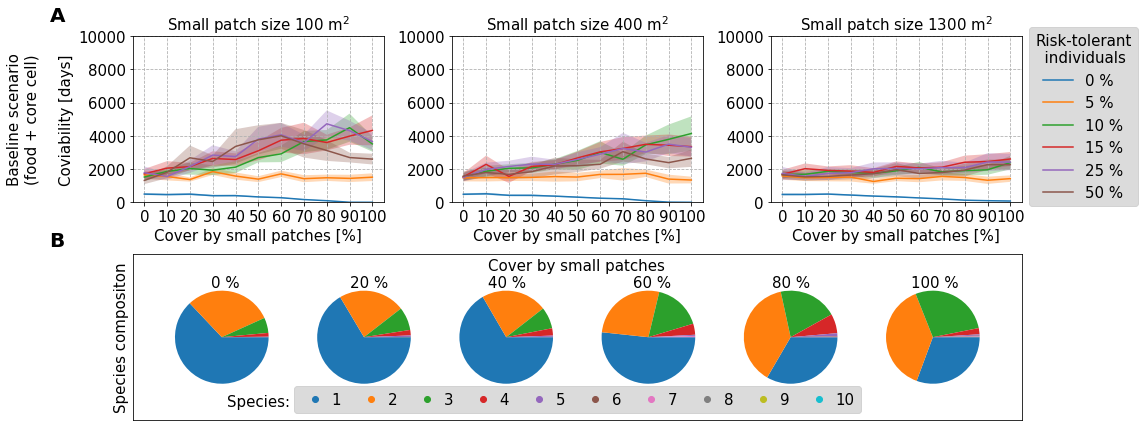

In [4]:
#plot coviability
plt.figure(figsize=(16,6))
plt.subplot2grid((2,3), (0, 0))
for j in np.arange(6):
    plt.plot(np.arange(0,1.1,0.1),covia[:,0,j],label=["0","5","10","15","25","50"][j]+" %")
    plt.fill_between(np.arange(0,1.1,0.1), covia_conf[:,0,j,0], covia_conf[:,0,j,1],alpha=0.3)
plt.xticks(np.arange(0,1.1,0.1),np.arange(0,110,10),fontsize=15)
plt.yticks([0,2000,4000,6000,8000,10000],fontsize=15)
plt.ylim(0,10000)
plt.grid(linestyle="--")
plt.title("Small patch size 100 m$^2$",fontsize=15)
plt.ylabel("Baseline scenario\n(food + core cell)\n\nCoviability [days]",fontsize=15)
plt.xlabel("Cover by small patches [%]",fontsize=15)
    
plt.subplot2grid((2,3), (0, 1))
for j in np.arange(6):
    plt.plot(np.arange(0,1.1,0.1),covia[:,1,j],label=["0","5","10","15","25","50"][j]+" %")
    plt.fill_between(np.arange(0,1.1,0.1), covia_conf[:,1,j,0], covia_conf[:,1,j,1],alpha=0.3)
plt.xticks(np.arange(0,1.1,0.1),np.arange(0,110,10),fontsize=15)
plt.yticks([0,2000,4000,6000,8000,10000],fontsize=15)
plt.ylim(0,10000)
plt.grid(linestyle="--")
plt.title("Small patch size 400 m$^2$",fontsize=15)
plt.xlabel("Cover by small patches [%]",fontsize=15)
    
plt.subplot2grid((2,3), (0, 2))
for j in np.arange(6):
    plt.plot(np.arange(0,1.1,0.1),covia[:,2,j],label=["0","5","10","15","25","50"][j]+" %")
    plt.fill_between(np.arange(0,1.1,0.1), covia_conf[:,2,j,0], covia_conf[:,2,j,1],alpha=0.3)
plt.xticks(np.arange(0,1.1,0.1),np.arange(0,110,10),fontsize=15)
plt.yticks([0,2000,4000,6000,8000,10000],fontsize=15)
plt.ylim(0,10000)
plt.grid(linestyle="--")
plt.title("Small patch size 1300 m$^2$",fontsize=15)
plt.xlabel("Cover by small patches [%]",fontsize=15)
plt.legend(title="Risk-tolerant\n  individuals",bbox_to_anchor=(1,1.1),fontsize=15,title_fontsize=15,facecolor="lightgrey");
plt.tight_layout()

#plot species composition
ax=plt.subplot2grid((2,3), (1, 0),colspan=3)
colsall=np.array(["tab:blue","tab:orange","tab:green","tab:red","tab:purple","tab:brown","tab:pink","tab:gray","tab:olive","tab:cyan"])
ins=ax.inset_axes([-0.15,0.15,0.5,0.7])
ins.pie(indivs[0,0,4,:],counterclock=False,colors=colsall)
plt.text(-0.03,1600,"0 %",fontsize=15)
ins=ax.inset_axes([0.01,0.15,0.5,0.7])
ins.pie(indivs[2,0,4,:],counterclock=False,colors=colsall)
plt.text(0.095,1600,"20 %",fontsize=15)
ins=ax.inset_axes([0.17,0.15,0.5,0.7])
ins.pie(indivs[4,0,4,:],counterclock=False,colors=colsall)
plt.text(0.22,1600,"40 %",fontsize=15)
ins=ax.inset_axes([0.33,0.15,0.5,0.7])
ins.pie(indivs[6,0,4,:],counterclock=False,colors=colsall)
plt.text(0.35,1600,"60 %",fontsize=15)
ins=ax.inset_axes([0.49,0.15,0.5,0.7])
ins.pie(indivs[8,0,4,:],counterclock=False,colors=colsall)
plt.text(0.475,1600,"80 %",fontsize=15)
ins=ax.inset_axes([0.65,0.15,0.5,0.7])
ins.pie(indivs[10,0,4,:],counterclock=False,colors=colsall)
plt.text(0.6,1600,"100 %",fontsize=15)
plt.text(0.22,1800,"Cover by small patches",fontsize=15)
plt.xlim(-0.1,0.7)
plt.xticks([])
plt.yticks([])
ax.set_ylim(0,2000)
plt.ylabel("Species compositon",fontsize=15)
labelsall=np.arange(1,11,1)
hand=[]
for i in range(10):
    handle, =plt.plot([0,0.6],[-100,-100],'o',label=labelsall[i],color=colsall[i])
    hand.append(handle)
plt.legend(handles=hand,loc="lower center",facecolor="lightgrey",fontsize=15,title_fontsize=15,ncol=11,columnspacing=1,handletextpad=0.1)
plt.text(-0.015, 170,"Species:",fontsize=15)

plt.tight_layout()
plt.text(-0.175,4800,"A",size=20, weight='bold')
plt.text(-0.175,2100,"B",size=20, weight='bold');

### Reduced functionality scenario

In [5]:
#read in data from reduced functionality scenario
reduced=pd.read_csv("data/reduced.csv",header=6,na_values=["<RuntimePrimitiveException>"])

In [6]:
#extract species composition and coviability from data
covia_red=np.zeros((11,3,6))
covia_conf_red=np.zeros((11,3,6,2))
mass_red=np.zeros((11,3,6))
indivs_red=np.zeros((11,3,6,10))
forage_use_red=np.zeros((10,20,11,3,6))
dx=0
for k in [0,0.05,0.1,0.15,0.25,0.5]:
    ix=0
    for i in np.unique(reduced["perc_small"]):
        jx=0
        for j in [1,4,13]:
            if dx>0 or ix<10 or jx>1: #in the case of 100% small patches that are no home range core cells, no bold individuals and small patch size with only edges (1 or 4) there are no individuals
                sub=reduced[np.logical_and(np.logical_and(reduced["perc_small"]==i,reduced["size_small"]==j),reduced["bold_prob"]==k)]
                covia_red[ix,jx,dx]=np.mean(sub["ticks"])
                covia_conf_red[ix,jx,dx,:]=st.t.interval(0.95, len(sub["ticks"])-1, loc=np.mean(sub["ticks"]), scale=st.sem(sub["ticks"]))
                mass_red[ix,jx,dx]=np.mean(sub['mean [mass] of turtles'])
                indivs_red[ix,jx,dx,:]=[np.mean(sub['count turtles with [species = 0]']),
                                 np.mean(sub['count turtles with [species = 1]']),
                                 np.mean(sub['count turtles with [species = 2]']),
                                 np.mean(sub['count turtles with [species = 3]']),
                                 np.mean(sub['count turtles with [species = 4]']),
                                 np.mean(sub['count turtles with [species = 5]']),
                                 np.mean(sub['count turtles with [species = 6]']),
                                 np.mean(sub['count turtles with [species = 7]']),
                                 np.mean(sub['count turtles with [species = 8]']),
                                 np.mean(sub['count turtles with [species = 9]'])]
                forage_use_red[:,:,ix,jx,dx]=np.array([sub['mean [forage_small] of turtles with [species = 0]'],
                                 sub['mean [forage_small] of turtles with [species = 1]'],
                                 sub['mean [forage_small] of turtles with [species = 2]'],
                                 sub['mean [forage_small] of turtles with [species = 3]'],
                                 sub['mean [forage_small] of turtles with [species = 4]'],
                                 sub['mean [forage_small] of turtles with [species = 5]'],
                                 sub['mean [forage_small] of turtles with [species = 6]'],
                                 sub['mean [forage_small] of turtles with [species = 7]'],
                                 sub['mean [forage_small] of turtles with [species = 8]'],
                                 sub['mean [forage_small] of turtles with [species = 9]']])
            jx=jx+1
        ix=ix+1
    dx=dx+1

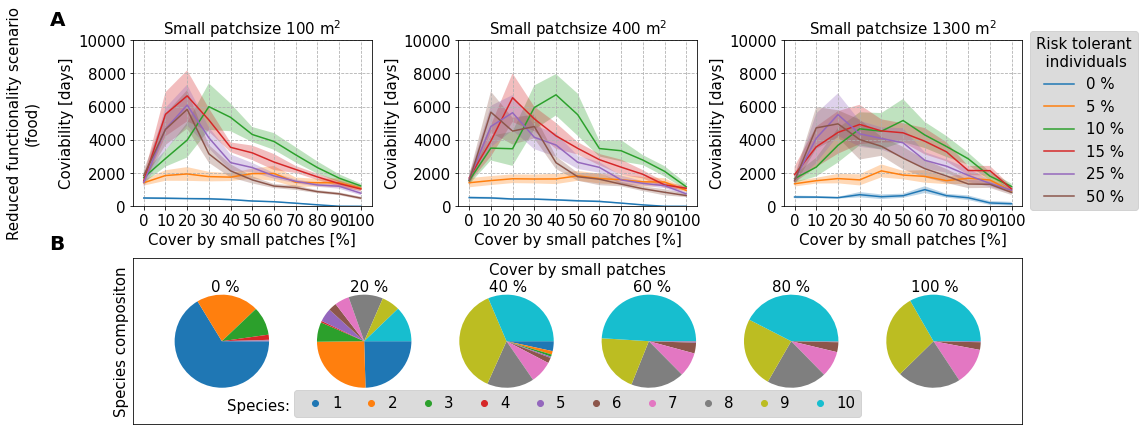

In [7]:
#plot coviability
plt.figure(figsize=(16,6))
plt.subplot2grid((2,3), (0, 0))
for j in range(6):
    plt.plot(np.arange(0,1.1,0.1),covia_red[:,0,j],label=["0","5","10","15","25","50"][j]+" %")
    plt.fill_between(np.arange(0,1.1,0.1), covia_conf_red[:,0,j,0], covia_conf_red[:,0,j,1],alpha=0.3)
plt.xticks(np.arange(0,1.1,0.1),np.arange(0,110,10),fontsize=15)
plt.yticks([0,2000,4000,6000,8000,10000],fontsize=15)
plt.ylim(0,10000)
plt.grid(linestyle="--")
plt.title("Small patchsize 100 m$^2$",fontsize=15)
plt.ylabel("Reduced functionality scenario\n(food)\n\nCoviability [days]",fontsize=15)
plt.xlabel("Cover by small patches [%]",fontsize=15)
    
plt.subplot2grid((2,3), (0, 1))
for j in range(6):
    plt.plot(np.arange(0,1.1,0.1),covia_red[:,1,j],label=["0","5","10","15","25","50"][j]+" %");
    plt.fill_between(np.arange(0,1.1,0.1), covia_conf_red[:,1,j,0], covia_conf_red[:,1,j,1],alpha=0.3)
plt.xticks(np.arange(0,1.1,0.1),np.arange(0,110,10),fontsize=15)
plt.yticks([0,2000,4000,6000,8000,10000],fontsize=15)
plt.ylim(0,10000)
plt.grid(linestyle="--")
plt.title("Small patchsize 400 m$^2$",fontsize=15)
plt.ylabel("Coviability [days]",fontsize=15)
plt.xlabel("Cover by small patches [%]",fontsize=15)
    
plt.subplot2grid((2,3), (0, 2))
for j in range(6):
    plt.plot(np.arange(0,1.1,0.1),covia_red[:,2,j],label=["0","5","10","15","25","50"][j]+" %");
    plt.fill_between(np.arange(0,1.1,0.1), covia_conf_red[:,2,j,0], covia_conf_red[:,2,j,1],alpha=0.3)
plt.xticks(np.arange(0,1.1,0.1),np.arange(0,110,10),fontsize=15)
plt.yticks([0,2000,4000,6000,8000,10000],fontsize=15)
plt.ylim(0,10000)
plt.grid(linestyle="--")
plt.title("Small patchsize 1300 m$^2$",fontsize=15)
plt.ylabel("Coviability [days]",fontsize=15)
plt.xlabel("Cover by small patches [%]",fontsize=15)
plt.legend(title="Risk tolerant\n  individuals",bbox_to_anchor=(1,1.1),facecolor="lightgrey",fontsize=15,title_fontsize=15);

#plot species composition
ax=plt.subplot2grid((2,3), (1, 0),colspan=3)
colsall=np.array(["tab:blue","tab:orange","tab:green","tab:red","tab:purple","tab:brown","tab:pink","tab:gray","tab:olive","tab:cyan"])
ins=ax.inset_axes([-0.15,0.15,0.5,0.7])
ins.pie(indivs_red[0,0,4,:],counterclock=False,colors=colsall)
plt.text(-0.03,1600,"0 %",fontsize=15)
ins=ax.inset_axes([0.01,0.15,0.5,0.7])
ins.pie(indivs_red[2,0,4,:],counterclock=False,colors=colsall)
plt.text(0.095,1600,"20 %",fontsize=15)
ins=ax.inset_axes([0.17,0.15,0.5,0.7])
ins.pie(indivs_red[4,0,4,:],counterclock=False,colors=colsall)
plt.text(0.22,1600,"40 %",fontsize=15)
ins=ax.inset_axes([0.33,0.15,0.5,0.7])
ins.pie(indivs_red[6,0,4,:],counterclock=False,colors=colsall)
plt.text(0.35,1600,"60 %",fontsize=15)
ins=ax.inset_axes([0.49,0.15,0.5,0.7])
ins.pie(indivs_red[8,0,4,:],counterclock=False,colors=colsall)
plt.text(0.475,1600,"80 %",fontsize=15)
ins=ax.inset_axes([0.65,0.15,0.5,0.7])
ins.pie(indivs_red[10,0,4,:],counterclock=False,colors=colsall)
plt.text(0.6,1600,"100 %",fontsize=15)
plt.text(0.22,1800,"Cover by small patches",fontsize=15)
plt.xlim(-0.1,0.7)
plt.xticks([])
plt.yticks([])
ax.set_ylim(0,2000)
plt.ylabel("Species compositon",fontsize=15)
labelsall=np.arange(1,11,1)
hand=[]
for i in range(10):
    handle, =plt.plot([0,0.6],[-100,-100],'o',label=labelsall[i],color=colsall[i])
    hand.append(handle)
plt.legend(handles=hand,loc="lower center",facecolor="lightgrey",fontsize=15,title_fontsize=15,ncol=11,columnspacing=1,handletextpad=0.1)
plt.text(-0.015, 170,"Species:",fontsize=15)

plt.tight_layout()
plt.text(-0.175,4800,"A",size=20, weight='bold')
plt.text(-0.175,2100,"B",size=20, weight='bold');

In [15]:
#read in data from baseline functionality scenario with daily measurements
#the available data is a subset including only one repetition per scenario
base_daily=pd.read_csv("data/base_daily_subset.csv",header=6,na_values=["<RuntimePrimitiveException>"])

In [19]:
#extract patch use and juvenile success from daily data
small_mean=np.zeros((11,10951))
large_mean=np.zeros((11,10951))
juv_suc=np.zeros((11,10951))
forage_use_daily=np.zeros((11,10,10951))
ix=0
for i in np.unique(base_daily["perc_small"]):
    sub=base_daily[base_daily["perc_small"]==i]
    large_mean[ix]=sub["mean [length spec-list] of patches with [patchquali = 1]"]
    small_mean[ix]=sub["mean [length spec-list] of patches with [patchquali = 2]"]
    juv_suc[ix]=sub["(count turtles with [age = 0]) / repro"]
    rx=0
    for r in np.unique(sub["[run number]"]):
        sub_r=sub[sub["[run number]"]==r]
        forage_use_daily[ix]=np.array([sub_r['mean [forage_small] of turtles with [species = 0]'],
                                 sub_r['mean [forage_small] of turtles with [species = 1]'],
                                 sub_r['mean [forage_small] of turtles with [species = 2]'],
                                 sub_r['mean [forage_small] of turtles with [species = 3]'],
                                 sub_r['mean [forage_small] of turtles with [species = 4]'],
                                 sub_r['mean [forage_small] of turtles with [species = 5]'],
                                 sub_r['mean [forage_small] of turtles with [species = 6]'],
                                 sub_r['mean [forage_small] of turtles with [species = 7]'],
                                 sub_r['mean [forage_small] of turtles with [species = 8]'],
                                 sub_r['mean [forage_small] of turtles with [species = 9]']])
        rx=rx+1
    ix=ix+1
large_mean[10]=0

In [24]:
#delete large dataset to free space
del base_daily

In [21]:
#read in data from reduced functionality scenario with daily measurements
#the available data is a subset including only one repetition per scenario
reduced_daily=pd.read_csv("data/reduced_daily_subset.csv",header=6,na_values=["<RuntimePrimitiveException>"])

In [22]:
#extract patch use and juvenile success from daily data
small_mean_red=np.zeros((11,10951))
large_mean_red=np.zeros((11,10951))
juv_suc_red=np.zeros((11,10951))
forage_use_daily_red=np.zeros((11,10,10951))
ix=0
for i in np.unique(reduced_daily["perc_small"]):
    sub=reduced_daily[reduced_daily["perc_small"]==i]
    large_mean_red[ix]=sub["mean [length spec-list] of patches with [patchquali = 1 and length spec-list > 0]"]
    small_mean_red[ix]=sub["mean [length spec-list] of patches with [patchquali = 2 and length spec-list > 0]"]
    juv_suc_red[ix]=sub["(count turtles with [age = 0]) / repro"]
    rx=0
    for r in np.unique(sub["[run number]"]):
        sub_r=sub[sub["[run number]"]==r]
        forage_use_daily_red[ix]=np.array([sub_r['mean [forage_small] of turtles with [species = 0]'],
                                 sub_r['mean [forage_small] of turtles with [species = 1]'],
                                 sub_r['mean [forage_small] of turtles with [species = 2]'],
                                 sub_r['mean [forage_small] of turtles with [species = 3]'],
                                 sub_r['mean [forage_small] of turtles with [species = 4]'],
                                 sub_r['mean [forage_small] of turtles with [species = 5]'],
                                 sub_r['mean [forage_small] of turtles with [species = 6]'],
                                 sub_r['mean [forage_small] of turtles with [species = 7]'],
                                 sub_r['mean [forage_small] of turtles with [species = 8]'],
                                 sub_r['mean [forage_small] of turtles with [species = 9]']])
        rx=rx+1
    ix=ix+1
large_mean_red[10]=0

In [23]:
#delete large dataset to free space
del reduced_daily

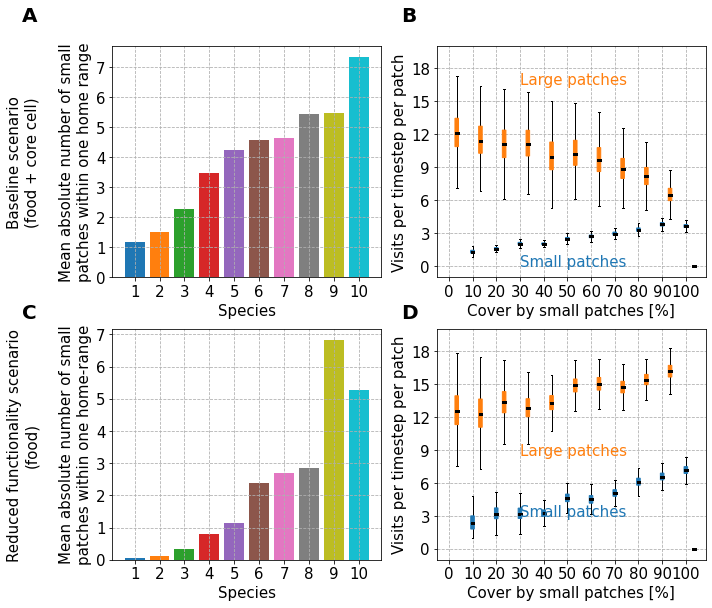

In [30]:
#barplot patch use
plt.figure(figsize=(10,8))
plt.subplot2grid((2,2), (0, 0))
colsall=np.array(["tab:blue","tab:orange","tab:green","tab:red","tab:purple","tab:brown","tab:pink","tab:gray","tab:olive","tab:cyan"])
#tips=np.nanmean(forage_use_daily,axis=(0,2))#[:,:,:,0,4].reshape(10,220).T #only possible with repetitions
#sns.barplot(data=tips,palette=colsall)
plt.bar(range(10),np.nanmean(forage_use_daily,axis=(0,2)),color=colsall)
plt.grid(linestyle="--")
plt.xticks(range(10),np.arange(1,11),fontsize=15)
plt.yticks([0,1,2,3,4,5,6,7],fontsize=15)
plt.xlabel("Species",fontsize=15)
plt.ylabel("Baseline scenario\n(food + core cell)\n\nMean absolute number of small\npatches within one home range",fontsize=15);
#plt.rcParams["axes.edgecolor"] = "black"

plt.subplot2grid((2,2), (0, 1))
for i in range(11): 
    j=0
    c="tab:blue"
    bp1=plt.boxplot(small_mean[i,][np.isnan(small_mean[i,])==False],positions=[i+j/3],patch_artist=True,boxprops=dict(facecolor=c, color=c),flierprops=dict(color=c, markeredgecolor=c),medianprops=dict(color="black",linewidth=3), notch=True, showfliers=False)
    j=1
    c="tab:orange"
    bp2=plt.boxplot(large_mean[i,][np.isnan(large_mean[i,])==False],positions=[i+j/3],patch_artist=True,boxprops=dict(facecolor=c, color=c),flierprops=dict(color=c, markeredgecolor=c),medianprops=dict(color="black",linewidth=3), notch=True, showfliers=False)
plt.xticks(range(11),np.arange(0,110,10),fontsize=15)
plt.yticks([0,3,6,9,12,15,18],fontsize=15)
plt.xlabel("Cover by small patches [%]",fontsize=15)
plt.grid(linestyle="--")
plt.ylabel("Visits per timestep per patch",fontsize=15)
plt.ylim(-1,20)
plt.text(3,16.5,"Large patches",color="tab:orange",fontsize=15)
plt.text(3,0,"Small patches",color="tab:blue",fontsize=15)
plt.tight_layout()

plt.subplot2grid((2,2), (1, 0))
colsall=np.array(["tab:blue","tab:orange","tab:green","tab:red","tab:purple","tab:brown","tab:pink","tab:gray","tab:olive","tab:cyan"])
#tips=np.nanmean(forage_use_daily_red,axis=(0,2))#forage_use_red[:,:,:,0,4].reshape(10,220).T #only possible with repetitions 
#sns.barplot(data=tips,palette=colsall)
plt.bar(range(10),np.nanmean(forage_use_daily_red,axis=(0,2)),color=colsall)
plt.grid(linestyle="--")
plt.xticks(range(10),np.arange(1,11),fontsize=15)
plt.yticks([0,1,2,3,4,5,6,7],fontsize=15)
plt.xlabel("Species",fontsize=15)
plt.ylabel("Reduced functionality scenario\n(food)\n\nMean absolute number of small\npatches within one home-range",fontsize=15);

#boxplot patch use
plt.subplot2grid((2,2), (1, 1))
for i in range(11): 
    j=0
    c="tab:blue"
    bp1=plt.boxplot(small_mean_red[i,][np.isnan(small_mean_red[i,])==False],positions=[i+j/3],patch_artist=True,boxprops=dict(facecolor=c, color=c),flierprops=dict(color=c, markeredgecolor=c),medianprops=dict(color="black",linewidth=3), notch=True, showfliers=False)
    j=1
    c="tab:orange"
    bp2=plt.boxplot(large_mean_red[i,][np.isnan(large_mean_red[i,])==False],positions=[i+j/3],patch_artist=True,boxprops=dict(facecolor=c, color=c),flierprops=dict(color=c, markeredgecolor=c),medianprops=dict(color="black",linewidth=3), notch=True, showfliers=False)
plt.xticks(range(11),np.arange(0,110,10),fontsize=15)
plt.yticks([0,3,6,9,12,15,18],fontsize=15)
plt.xlabel("Cover by small patches [%]",fontsize=15)
plt.grid(linestyle="--")
plt.ylabel("Visits per timestep per patch",fontsize=15)
plt.ylim(-1,20)
plt.text(3,8.5,"Large patches",color="tab:orange",fontsize=15)
plt.text(3,3,"Small patches",color="tab:blue",fontsize=15)
plt.tight_layout()

plt.text(-18,48,"A",size=20, weight='bold')
plt.text(-2,48,"B",size=20, weight='bold')
plt.text(-18,21,"C",size=20, weight='bold')
plt.text(-2,21,"D",size=20, weight='bold');

### Stepping stone scenario

In [31]:
#read in data for stepping stone scenario
stepping=pd.read_csv("data/stepstone.csv",header=6)

In [32]:
#extract species composition and coviability from data
covia_stepping=np.zeros((11,1,6))
covia_conf_stepping=np.zeros((11,1,6,2))
indivs_stepping=np.zeros((11,1,6,10))
ss_stepping=np.zeros((11,1,6,10))
dx=0
for bold in [0.0,0.05,0.10,0.15,0.25,0.5]:
    data=stepping[stepping["bold_prob"]==bold]
    ix=0
    for i in np.unique(stepping["perc_small"]):
        jx=0
        for j in [1]:
            if dx>0 or ix<10: #in the case of 100% small patches, no bold individuals and small patch size with only edges there are no individuals
                sub=data[np.logical_and(data["perc_small"]==i,data["size_small"]==j)]
                covia_stepping[ix,jx,dx]=np.mean(sub["ticks"])
                covia_conf_stepping[ix,jx,dx,:]=st.t.interval(0.95, len(sub["ticks"])-1, loc=np.mean(sub["ticks"]), scale=st.sem(sub["ticks"]))
                indivs_stepping[ix,jx,dx,:]=[np.mean(sub['count turtles with [species = 0]']),
                                 np.mean(sub['count turtles with [species = 1]']),
                                 np.mean(sub['count turtles with [species = 2]']),
                                 np.mean(sub['count turtles with [species = 3]']),
                                 np.mean(sub['count turtles with [species = 4]']),
                                 np.mean(sub['count turtles with [species = 5]']),
                                 np.mean(sub['count turtles with [species = 6]']),
                                 np.mean(sub['count turtles with [species = 7]']),
                                 np.mean(sub['count turtles with [species = 8]']),
                                 np.mean(sub['count turtles with [species = 9]'])]
                ss_stepping[ix,jx,dx,:]=[np.mean(sub['count turtles with [ss-use and species = 0]']),
                                 np.mean(sub['count turtles with [ss-use and species = 1]']),
                                 np.mean(sub['count turtles with [ss-use and species = 2]']),
                                 np.mean(sub['count turtles with [ss-use and species = 3]']),
                                 np.mean(sub['count turtles with [ss-use and species = 4]']),
                                 np.mean(sub['count turtles with [ss-use and species = 5]']),
                                 np.mean(sub['count turtles with [ss-use and species = 6]']),
                                 np.mean(sub['count turtles with [ss-use and species = 7]']),
                                 np.mean(sub['count turtles with [ss-use and species = 8]']),
                                 np.mean(sub['count turtles with [ss-use and species = 9]'])]
            jx=jx+1
        ix=ix+1
    dx=dx+1

In [33]:
#read in data for stepping stone scenario with daily measurements
#the available data is a subset including only one repetition per scenario
stepping_daily=pd.read_csv("data/stepstone_daily_subset.csv",header=6,na_values=["<RuntimePrimitiveException>"])

In [34]:
#extract juvenile success from daily data
shannon_stepping=np.zeros([1,11,1,10951])
juv_suc_stepping=np.zeros([1,11,1,10951])
bolds=[0.25]
for k in range(1):
    data=stepping_daily[stepping_daily["bold_prob"]==bolds[k]]
    ix=0
    for i in np.arange(0,1.1,0.1):
        sub=data[data["perc_small"]==i]
        runs=np.unique(sub["[run number]"])
        r=0
        for run in runs:
            sub_run=sub[sub["[run number]"]==run]
            shannon_stepping[k,ix,r,0:len(sub_run["shannon"])]=sub_run["shannon"]
            juv_suc_stepping[k,ix,r,0:len(sub_run["spec_num"])]=sub_run["(count turtles with [age = 0]) / repro"]
            r=r+1
        ix=ix+1

In [35]:
#delete large dataset to free space
del stepping_daily

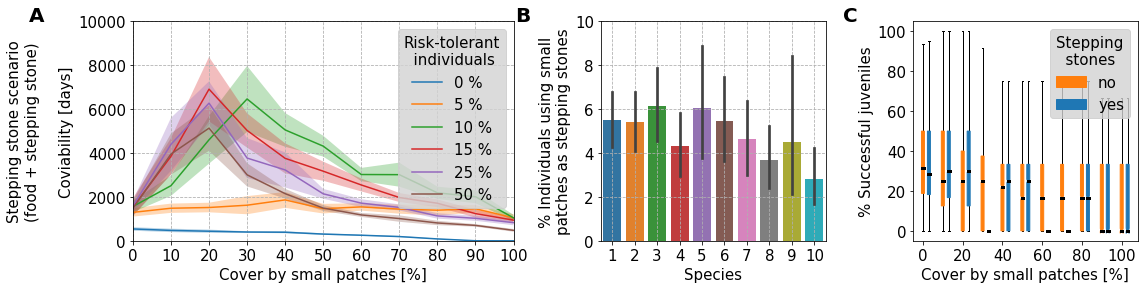

In [36]:
#plot coviability
plt.figure(figsize=(16,4))
plt.subplot2grid((1,7), (0, 0),colspan=3)
colsall=np.array(["tab:blue","tab:orange","tab:green","tab:red","tab:purple","tab:brown","tab:pink","tab:gray","tab:olive","tab:cyan"])
for j in range(6):
    plt.plot(np.arange(0,1.1,0.1),covia_stepping[:,0,j],color=colsall[j],label=["0","5","10","15","25","50"][j]+" %");
    plt.fill_between(np.arange(0,1.1,0.1), covia_conf_stepping[:,0,j,0], covia_conf_stepping[:,0,j,1],alpha=0.3)
plt.ylim(0,10000)
plt.xlim(0,0.8)
plt.grid(linestyle="--")
plt.xticks(np.arange(0,1.1,0.1),np.arange(0,110,10),fontsize=15)
plt.yticks([0,2000,4000,6000,8000,10000],fontsize=15)
plt.ylabel("Stepping stone scenario\n(food + stepping stone)\n\nCoviability [days]",fontsize=15)
plt.xlabel("Cover by small patches [%]",fontsize=15)
plt.legend(title="Risk-tolerant\n  individuals",fontsize=15,facecolor="lightgrey",title_fontsize=15)  

#barplot patch use
plt.subplot2grid((1,7), (0, 3),colspan=2)
colsall=np.array(["tab:blue","tab:orange","tab:green","tab:red","tab:purple","tab:brown","tab:pink","tab:gray","tab:olive","tab:cyan"])
tips = ss_stepping[:,0]/(indivs_stepping[:,0]+0.00001)*100
tips=tips.reshape(66,10)
sns.barplot(data=tips,palette=colsall)
plt.grid(linestyle="--")
plt.xticks(range(10),np.arange(1,11),fontsize=15)
plt.yticks([0,2,4,6,8,10],fontsize=15)
plt.xlabel("Species",fontsize=15)
plt.ylabel("% Individuals using small\npatches as stepping stones",fontsize=15)

#boxplot juvenile success
plt.subplot2grid((1,7), (0, 5),colspan=2)
for i in np.arange(0,11):  
    c="tab:orange"
    bp1=plt.boxplot(np.ndarray.flatten(juv_suc_red[i]*100)[~np.isnan(np.ndarray.flatten(juv_suc_red[i]))],positions=[i],patch_artist=True,boxprops=dict(facecolor=c, color=c),flierprops=dict(color=c, markeredgecolor=c),medianprops=dict(color="black",linewidth=3), notch=True, showfliers=False)
    c="tab:blue"
    bp2=plt.boxplot(np.ndarray.flatten(juv_suc_stepping[0,i,]*100)[~np.isnan(np.ndarray.flatten(juv_suc_stepping[0,i,]))],positions=[i+0.3],patch_artist=True,boxprops=dict(facecolor=c, color=c),flierprops=dict(color=c, markeredgecolor=c),medianprops=dict(color="black",linewidth=3), notch=True, showfliers=False)
plt.ylabel("% Successful juveniles",fontsize=15)
plt.xlabel("Cover by small patches [%]",fontsize=15)
plt.xticks(np.arange(0,11,2),np.arange(0,110,20),fontsize=15)
plt.yticks([0,20,40,60,80,100],fontsize=15)
plt.legend([bp1["boxes"][0], bp2["boxes"][0]],["no","yes"],loc="upper right",title="Stepping\n  stones",facecolor="lightgrey",fontsize=15,title_fontsize=15)
plt.tight_layout()

plt.text(-45,105,"A",size=20, weight='bold')
plt.text(-20.5,105,"B",size=20, weight='bold')
plt.text(-4,105,"C",size=20, weight='bold');

### Increasing habitat scenario

In [37]:
#read in data for increasing habitat scenario for baseline and reduced functionality
increasinghabitat_base=pd.read_csv("data/increasinghabitat_base.csv",header=6,na_values=["<RuntimePrimitiveException>"])
increasinghabitat_reduced=pd.read_csv("data/increasinghabitat_reduced.csv",header=6,na_values=["<RuntimePrimitiveException>"])

In [38]:
#extract species composition and coviability from data (baseline)
covia_increase=np.zeros((11,1,6))
covia_conf_increase=np.zeros((11,1,6,2))
mass_increase=np.zeros((11,1,6))
indivs_increase=np.zeros((11,1,6,10))
dx=0
for bold in [0,0.05,0.1,0.15,0.25,0.5]:
    data=increasinghabitat_base[increasinghabitat_base["bold_prob"]==bold]
    ix=0
    for i in np.unique(data["perc_small"]):
        jx=0
        for j in [1]:
            sub=data[np.logical_and(data["perc_small"]==i,data["size_small"]==j)]
            covia_increase[ix,jx,dx]=np.mean(sub["ticks"])
            covia_conf_increase[ix,jx,dx,:]=st.t.interval(0.95, len(sub["ticks"])-1, loc=np.mean(sub["ticks"]), scale=st.sem(sub["ticks"]))
            mass_increase[ix,jx,dx]=np.mean(sub['mean [mass] of turtles'])
            indivs_increase[ix,jx,dx,:]=[np.mean(sub['count turtles with [species = 0]']),
                             np.mean(sub['count turtles with [species = 1]']),
                             np.mean(sub['count turtles with [species = 2]']),
                             np.mean(sub['count turtles with [species = 3]']),
                             np.mean(sub['count turtles with [species = 4]']),
                             np.mean(sub['count turtles with [species = 5]']),
                             np.mean(sub['count turtles with [species = 6]']),
                             np.mean(sub['count turtles with [species = 7]']),
                             np.mean(sub['count turtles with [species = 8]']),
                             np.mean(sub['count turtles with [species = 9]'])]
            jx=jx+1
        ix=ix+1
    dx=dx+1

In [39]:
#extract species composition and coviability from data (reduced functionality)
covia_increase_red=np.zeros((11,1,6))
covia_conf_increase_red=np.zeros((11,1,6,2))
mass_increase_red=np.zeros((11,1,6))
indivs_increase_red=np.zeros((11,1,6,10))
dx=0
for bold in [0,0.05,0.1,0.15,0.25,0.5]:
    data=increasinghabitat_reduced[increasinghabitat_reduced["bold_prob"]==bold]
    ix=0
    for i in np.unique(data["perc_small"]):
        jx=0
        for j in [1]:
            sub=data[np.logical_and(data["perc_small"]==i,data["size_small"]==j)]
            covia_increase_red[ix,jx,dx]=np.mean(sub["ticks"])
            covia_conf_increase_red[ix,jx,dx,:]=st.t.interval(0.95, len(sub["ticks"])-1, loc=np.mean(sub["ticks"]), scale=st.sem(sub["ticks"]))
            mass_increase_red[ix,jx,dx]=np.mean(sub['mean [mass] of turtles'])
            indivs_increase_red[ix,jx,dx,:]=[np.mean(sub['count turtles with [species = 0]']),
                             np.mean(sub['count turtles with [species = 1]']),
                             np.mean(sub['count turtles with [species = 2]']),
                             np.mean(sub['count turtles with [species = 3]']),
                             np.mean(sub['count turtles with [species = 4]']),
                             np.mean(sub['count turtles with [species = 5]']),
                             np.mean(sub['count turtles with [species = 6]']),
                             np.mean(sub['count turtles with [species = 7]']),
                             np.mean(sub['count turtles with [species = 8]']),
                             np.mean(sub['count turtles with [species = 9]'])]
            jx=jx+1
        ix=ix+1
    dx=dx+1

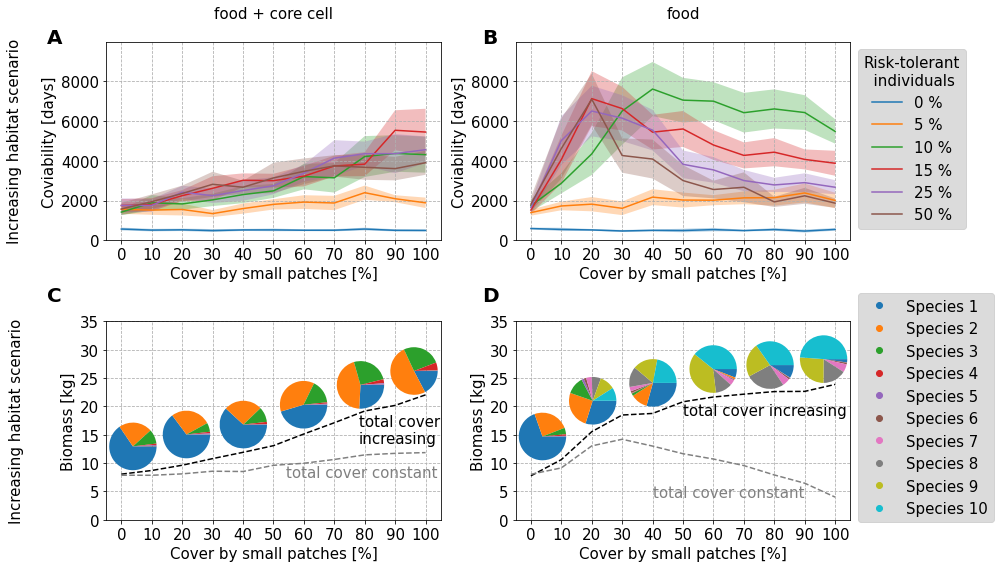

In [42]:
#plot coviability baseline
plt.figure(figsize=(14,8))
plt.subplot2grid((2,2), (0, 0),colspan=1)
for j in range(6):
    plt.plot(np.arange(0,1.1,0.1),covia_increase[:,0,j],color=colsall[j],label=["0","5","10","15","25","50"][j]+" %");
    plt.fill_between(np.arange(0,1.1,0.1), covia_conf_increase[:,0,j,0], covia_conf_increase[:,0,j,1],alpha=0.3)
plt.ylim(0,10000)
plt.grid(linestyle="--")
plt.xticks(np.arange(0,1.1,0.1),np.arange(0,110,10),fontsize=15)
plt.yticks([0,2000,4000,6000,8000],fontsize=15)
plt.ylabel("Increasing habitat scenario\n\nCoviability [days]",fontsize=15)
plt.xlabel("Cover by small patches [%]",fontsize=15)
plt.title("food + core cell\n",fontsize=15)

#plot coviability reduced functionality
plt.subplot2grid((2,2), (0, 1),colspan=1)
for j in range(6):
    plt.plot(np.arange(0,1.1,0.1),covia_increase_red[:,0,j],color=colsall[j],label=["0","5","10","15","25","50"][j]+" %");
    plt.fill_between(np.arange(0,1.1,0.1), covia_conf_increase_red[:,0,j,0], covia_conf_increase_red[:,0,j,1],alpha=0.3)
plt.ylim(0,10000)
plt.grid(linestyle="--")
plt.xticks(np.arange(0,1.1,0.1),np.arange(0,110,10),fontsize=15)
plt.yticks([0,2000,4000,6000,8000],fontsize=15)
plt.ylabel("Coviability [days]",fontsize=15)
plt.xlabel("Cover by small patches [%]",fontsize=15)
plt.title("food\n",fontsize=15)
plt.legend(loc="upper left",title="Risk-tolerant\n  individuals",fontsize=15,title_fontsize=15,facecolor="lightgrey",bbox_to_anchor=(1,1));

#plot species composition
ax = plt.subplot2grid((2,2), (1, 0),colspan=1)
colsall=np.array(["tab:blue","tab:orange","tab:green","tab:red","tab:purple","tab:brown","tab:pink","tab:gray","tab:olive","tab:cyan"])
ins=ax.inset_axes([-0.07,0.22,0.3,0.3])
ins.pie(indivs_increase[0,0,4,:],counterclock=False,colors=colsall)
ins=ax.inset_axes([0.09,0.28,0.3,0.3])
ins.pie(indivs_increase[2,0,4,:],counterclock=False,colors=colsall)
ins=ax.inset_axes([0.26,0.33,0.3,0.3])
ins.pie(indivs_increase[4,0,4,:],counterclock=False,colors=colsall)
ins=ax.inset_axes([0.44,0.43,0.3,0.3])
ins.pie(indivs_increase[6,0,4,:],counterclock=False,colors=colsall)
ins=ax.inset_axes([0.61,0.53,0.3,0.3])
ins.pie(indivs_increase[8,0,4,:],counterclock=False,colors=colsall)
ins=ax.inset_axes([0.77,0.6,0.3,0.3])
ins.pie(indivs_increase[10,0,4,:],counterclock=False,colors=colsall)
ax.plot(np.arange(0,1.1,0.1),np.sum(indivs_increase[:,0,4,:],axis=1)*mass_increase[:,0,4],"--",color="black",label="total cover increasing")
ax.plot(np.arange(0,1.1,0.1),np.sum(indivs[:,0,4,:],axis=1)*mass[:,0,4],"--",color="grey",label="total cover constant")
ax.set_ylim(0,35)#42)
plt.xlabel("Cover by small patches [%]",fontsize=15)
plt.yticks([0,5,10,15,20,25,30,35],fontsize=15)
plt.grid(linestyle="--")
plt.ylabel("Increasing habitat scenario\n\n\nBiomass [kg]",fontsize=15)
plt.xticks(np.arange(0,1.1,0.1),np.arange(0,110,10),fontsize=15)
plt.text(0.78,13.5,"total cover\nincreasing",fontsize=15)
plt.text(0.54,7.5,"total cover constant",color="grey",fontsize=15)
labelsall=["Species 1","Species 2","Species 3","Species 4","Species 5","Species 6","Species 7","Species 8","Species 9","Species 10"]
hand=[]
for i in range(10):
    handle, =plt.plot(0,-1,'o',label=labelsall[i],color=colsall[i])
    hand.append(handle)

ax = plt.subplot2grid((2,2), (1, 1),colspan=1)
colsall=np.array(["tab:blue","tab:orange","tab:green","tab:red","tab:purple","tab:brown","tab:pink","tab:gray","tab:olive","tab:cyan"])
ins=ax.inset_axes([-0.07,0.27,0.3,0.3])
ins.pie(indivs_increase_red[0,0,4,:],counterclock=False,colors=colsall)
ins=ax.inset_axes([0.08,0.45,0.3,0.3])
ins.pie(indivs_increase_red[2,0,4,:],counterclock=False,colors=colsall)
ins=ax.inset_axes([0.26,0.54,0.3,0.3])
ins.pie(indivs_increase_red[4,0,4,:],counterclock=False,colors=colsall)
ins=ax.inset_axes([0.44,0.61,0.3,0.3])
ins.pie(indivs_increase_red[6,0,4,:],counterclock=False,colors=colsall)
ins=ax.inset_axes([0.61,0.63,0.3,0.3])
ins.pie(indivs_increase_red[8,0,4,:],counterclock=False,colors=colsall)
ins=ax.inset_axes([0.77,0.66,0.3,0.3])
ins.pie(indivs_increase_red[10,0,4,:],counterclock=False,colors=colsall)
ax.plot(np.arange(0,1.1,0.1),np.sum(indivs_increase_red[:,0,4,:],axis=1)*mass_increase_red[:,0,4],"--",color="black",label="total cover increasing")
ax.plot(np.arange(0,1.1,0.1),np.sum(indivs_red[:,0,4,:],axis=1)*mass_red[:,0,4],"--",color="grey",label="total cover constant")
ax.set_ylim(0,35)
plt.xlabel("Cover by small patches [%]",fontsize=15)
plt.yticks([0,5,10,15,20,25,30,35],fontsize=15)
plt.grid(linestyle="--")
plt.ylabel("Biomass [kg]",fontsize=15)
plt.xticks(np.arange(0,1.1,0.1),np.arange(0,110,10),fontsize=15)
plt.text(0.5,18.5,"total cover increasing",fontsize=15)
plt.text(0.4,4,"total cover constant",color="grey",fontsize=15)
labelsall=["Species 1","Species 2","Species 3","Species 4","Species 5","Species 6","Species 7","Species 8","Species 9","Species 10"]
hand=[]
for i in range(10):
    handle, =plt.plot(0,-1,'o',label=labelsall[i],color=colsall[i])
    hand.append(handle)
plt.legend(handles=hand,loc="lower left",bbox_to_anchor=(1,-0.05),facecolor="lightgrey",columnspacing=1.5,fontsize=15,title_fontsize=15)
plt.tight_layout()

plt.text(-1.4,2.4,"A",size=20, transform=ax.transAxes, weight='bold')
plt.text(-0.1,2.4,"B",size=20, transform=ax.transAxes, weight='bold')
plt.text(-1.4,1.1,"C",size=20, transform=ax.transAxes, weight='bold')
plt.text(-0.1,1.1,"D",size=20, transform=ax.transAxes, weight='bold');